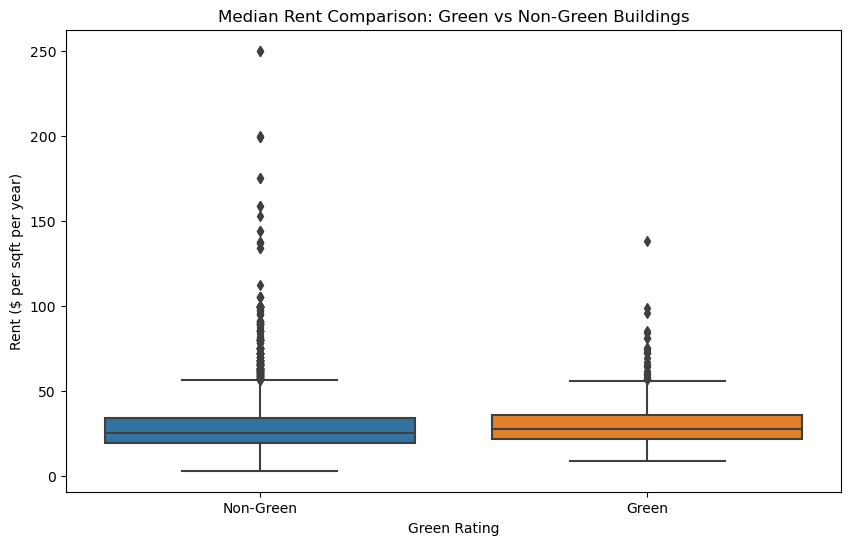

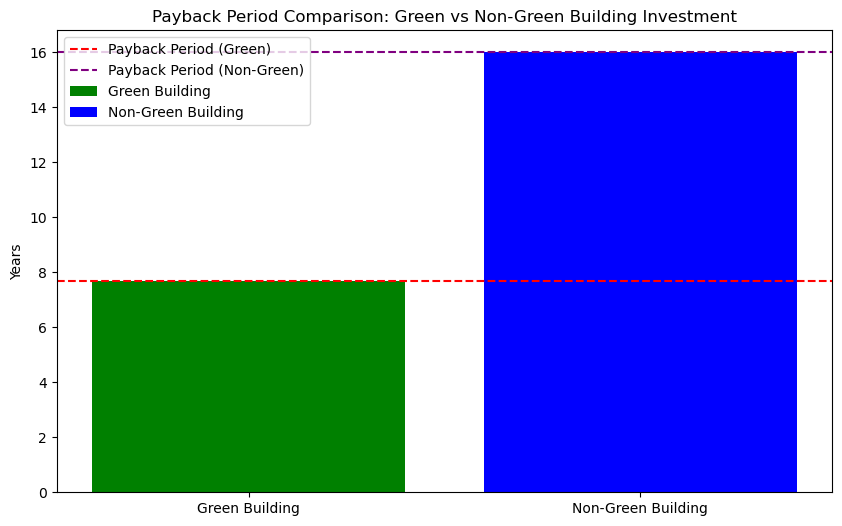

                   Metric         Value
0  Median Rent (per sqft)  2.760000e+01
1  Extra Revenue per Year  6.500000e+05
2  Expected Premium Costs  5.000000e+06
3  Payback Period (years)  7.692308e+00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('greenbuildings.csv')

# Filter out buildings with low occupancy rates
data = data[data['leasing_rate'] >= 0.1]

# Calculate median market rent for green and non-green buildings
median_rent_green = data[data['green_rating'] == 1]['Rent'].median()
median_rent_non_green = data[data['green_rating'] == 0]['Rent'].median()

# Calculate expected extra revenue and construction costs
building_size = 250000  # square feet
expected_premium_percent = 0.05
expected_construction_costs = 100000000  # $100 million

# Calculate revenue difference and construction costs
extra_revenue_per_year = (median_rent_green - median_rent_non_green) * building_size
extra_revenue_total = extra_revenue_per_year * (data['stories'].max() - data['age'].min())  # Assuming 30 years

expected_premium_costs = expected_construction_costs * expected_premium_percent

# Calculate the payback period
payback_period_years = expected_premium_costs / extra_revenue_per_year
payback_period_non_green = expected_construction_costs / (median_rent_non_green * building_size)

# Visualization 1: Median Rent Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='green_rating', y='Rent')
plt.title('Median Rent Comparison: Green vs Non-Green Buildings')
plt.xlabel('Green Rating')
plt.ylabel('Rent ($ per sqft per year)')
plt.xticks([0, 1], ['Non-Green', 'Green'])
plt.show()

# Visualization 2: Payback Period Comparison
plt.figure(figsize=(10, 6))
plt.bar(['Green Building'], [payback_period_years], color='green', label='Green Building')
plt.bar(['Non-Green Building'], [payback_period_non_green], color='blue', label='Non-Green Building')
plt.axhline(y=payback_period_years, color='red', linestyle='--', label='Payback Period (Green)')
plt.axhline(y=payback_period_non_green, color='purple', linestyle='--', label='Payback Period (Non-Green)')

plt.title('Payback Period Comparison: Green vs Non-Green Building Investment')
plt.ylabel('Years')
plt.legend()
plt.show()

# Display key data in a table
table_data = {
    'Metric': ['Median Rent (per sqft)', 'Extra Revenue per Year', 'Expected Premium Costs', 'Payback Period (years)'],
    'Value': [median_rent_green, extra_revenue_per_year, expected_premium_costs, payback_period_years]
}

table = pd.DataFrame(table_data)
print(table)


We agree with the conclusion of her on-staff guru to move forward with the green building because of the economical and environmental advantages it provides. Firstly, the payback period of the green building is half the time of the non-green building, thus our investment will be recouped faster. Furthmore, the box plot indicates how many outliers and the range of them for the non-green building. This indicates extra skew for the building, and thus makes it harder to interpret its results. Finally, there's a few metrics and their corresponding values on display. An important notable value is "extra revenue per year" which indicates that a green building will generate an extra $650,000 per year versus the non-green building.